In [1]:
!pip install konlpy
!pip install collections
!pip install wordcloud
!pip install sys

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections
ERROR: Could not find a version that satisfies the requirement sys (from versions: none)
ERROR: No matching distribution found for sys


In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -f
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded
rm: cannot remove '/root/.cache/matplotlib

In [2]:
#

import pandas as pd
import numpy as np
%matplotlib inline
import sys
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

data = pd. read_csv('train.csv',encoding='utf-8')
data



,id,document,label
0,1,영상이나 음악이 이쁘다 해도 미화시킨 불륜일뿐,0
1,2,히치콕이 이 영화를 봤다면 분명 박수를 쳤을듯...,1
2,3,괜찮은 음악영화가 또 나왔군요!!! 따뜻한 겨울이 될 것 같아요~,1
3,4,아무래도 20년도지난작품이라 지금보기는너무유치하다,0
4,5,지금까지의 영화들이 그랬듯. 이 영화역시 일본에 대한 미화는 여전하다.,0
...,...,...,...
4995,4996,좋은 배우들로 3류영화를 찍은 안타까운 영화,0
4996,4997,진짜 드럽게 재미없다 에드워드 호퍼 그림에 배경 빼고는 볼게 아닌영화,0
4997,4998,가장 실망스러운 영화.. 지금까지 본영화중..,0
4998,4999,"이런 평점 테러, 네이버에서 좀 막아야 하는 것 아닌가?",1


In [3]:
mask_pos = (data.label == 1) #데이터에서 label칼럼에서 자료값이 1인것을 긍정오브젝트에 넣는다.
mask_neg = (data.label == 0)

df_train= data.document.copy() # document 칼럼만 복제
df_pos = data. loc[mask_pos,:].document # 오.. 이렇게 따로 오브젝트로 구별된 행도 loc로 불러 호출 가능하구나
df_neg = data.loc[mask_neg,:].document 
compare = [df_train, df_pos, df_neg]

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


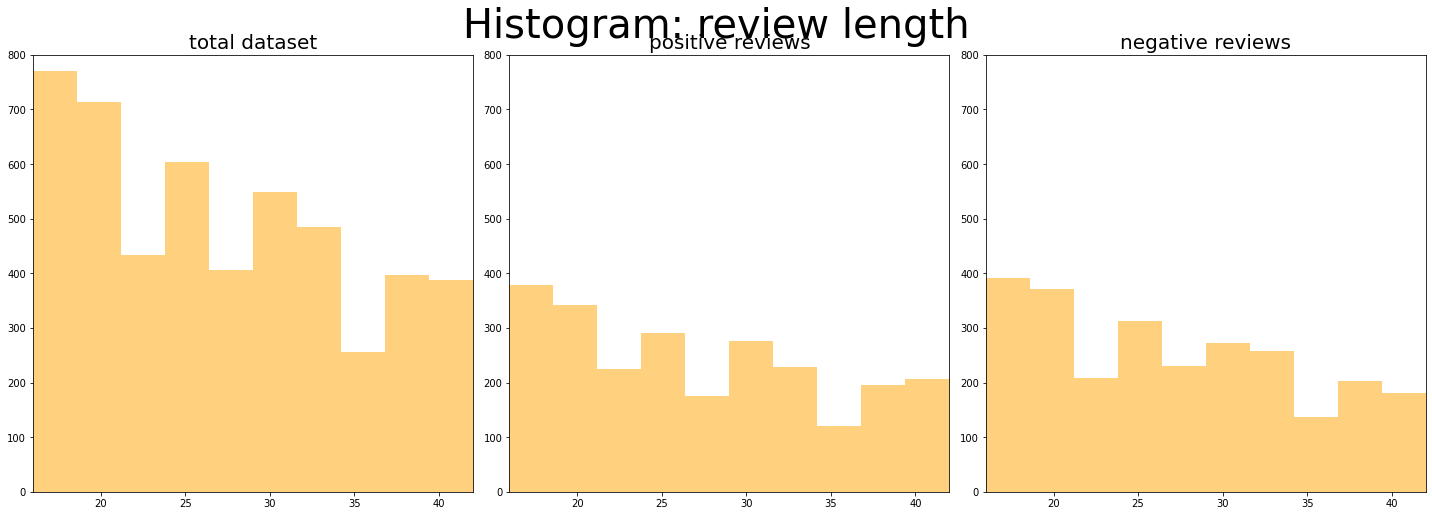

In [4]:
plt.figure(figsize=(20, 7.5))
plt.suptitle('Histogram: review length', fontsize=40)
name = ['total dataset', 'positive reviews', 'negative reviews']

for i in range(len(compare)):
  document = compare[i]
  string_len = [len(x) for x in document]
  plt.subplot(1,3,i+1)
  plt.title(name[i], fontsize=20)
  plt.axis([16,42, 0, 800])
  plt.hist(string_len, alpha=0.5, color='orange')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) #(도표의 외곽과 서브픗롯의 외각사이에 패딩, 패딩_높이,패딩_넓이(서브,))
plt.show()

긍정리뷰와 부정리뷰의 수는 비등비등하다. 

In [5]:
word_split = data['document'].str.split() 
# * str은 객체의 문자정보를 가져옴 
# *split 문자를 분리해주는데 아무것도 타이핑 하지 않으면 띄어쓰기; 엔터를 기준으로 분리
word_split[:5] # 모든행; 하지만 5개의 열만 

0                     [영상이나, 음악이, 이쁘다, 해도, 미화시킨, 불륜일뿐]
1                 [히치콕이, 이, 영화를, 봤다면, 분명, 박수를, 쳤을듯...]
2       [괜찮은, 음악영화가, 또, 나왔군요!!!, 따뜻한, 겨울이, 될, 것, 같아요~]
3                      [아무래도, 20년도지난작품이라, 지금보기는너무유치하다]
4    [지금까지의, 영화들이, 그랬듯., 이, 영화역시, 일본에, 대한, 미화는, 여전하다.]
Name: document, dtype: object

In [6]:
#17 전체 리뷰들을 하나의 문자열로 만듬
def df2str(df):
    
    s = [s for s in df]
    document = ""
    for i in range(len(s)):
        document += s[i]
    return document

#18 명사추출하기 
def get_noun(text):
   
    okt = Okt()
    noun = okt.nouns(text)
    for i,v in enumerate(noun):
        if len(v)<2:
            noun.pop(i)
    count = Counter(noun)
    noun_list = count.most_common(100)

    return noun_list

#19 워드클라우드 이미지 생성하기
def visualize(noun_list, title):
    # 워드클라우드 이미지 생성
    wc= WordCloud(
        font_path = 'NanumBarunGothic.ttf',    # 한글폰트 경로 설정
        background_color='white',                             # 배경 색깔 정하기
        colormap = 'Dark2',                                # 폰트 색깔 정하기
        width = 800,
        height = 800).generate_from_frequencies(dict(noun_list)) 
    
    plt.figure(figsize=(10,10)) #이미지 사이즈 지정
    plt.suptitle("Word Cloud", fontsize=40)
    plt.title(title, fontsize=20)
    plt.imshow(wc, interpolation='lanczos') #이미지의 부드럽기 정도
    plt.axis('off') #x y 축 숫자 제거
    plt.show()  # 워드클라우드 이미지 확인
    
    return wc

In [7]:
document = df2str(df_train)
noun_list = get_noun(document)
noun_list[:5]


[('영화', 1501), ('정말', 320), ('진짜', 269), ('최고', 220), ('평점', 185)]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47568 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_

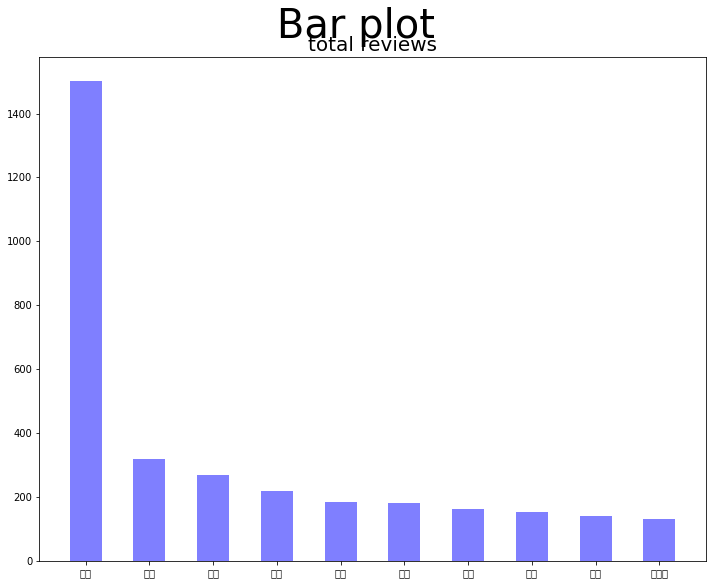

In [9]:
plt.rc('font', family='NanumBarunGothic')
top_10 = dict(noun_list[:10])
plt.figure(figsize=(10,8.5))
plt.suptitle('Bar plot', fontsize=40)
plt.title('total reviews', fontsize=20)
plt.bar(top_10.keys(), top_10.values(), width=0.5, color='b', alpha=0.5)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


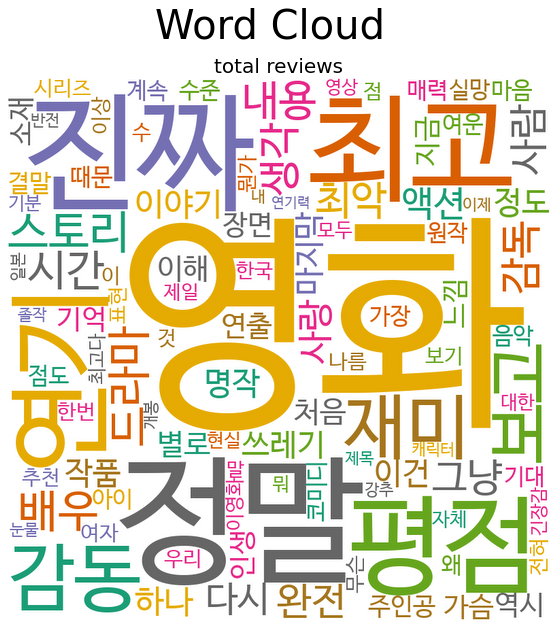

In [11]:
total_reviews = visualize(noun_list,'total reviews')